# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: Sergio

Apellidos: Cuenca Núñez

Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del examen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el examen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Análisis descriptivos


In [17]:
import os
import pandas as pd

path = os.path.abspath("housing_time_series_by_madrid_neighbourhood.csv")
df = pd.read_csv(path)

In [18]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

neighbourhood_group    0
date                   0
m2_price               0
inflation              0
HICP                   0
population_density     0
listings_count         0
minimum_nights         0
nigth_price            0
availability_365       0
listing_reviews        0
number_of_reviews      0
reviews_per_month      0
hosts_count            0
Private_room           0
Entire_home            0
Hotel_room             0
Shared_room            0
dtype: int64


In [19]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [20]:
df.describe()

,date,m2_price,inflation,HICP,population_density,listings_count,minimum_nights,nigth_price,availability_365,listing_reviews,number_of_reviews,reviews_per_month,hosts_count,Private_room,Entire_home,Hotel_room,Shared_room
count,2218,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000
mean,2018-09-02 01:15:57.619476992,12.884472,0.166231,1.914022,827.942290,124.464833,7.589035,102.360413,148.970967,414.588819,164.314739,1.889709,78.683950,26.623084,96.818305,0.407124,0.616321
min,2010-08-01 00:00:00,7.400000,-1.900000,-1.500000,795.000000,1.000000,1.000000,17.000000,0.000000,1.000000,16.000000,0.130000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-03-01 00:00:00,10.900000,-0.100000,0.000000,807.000000,6.000000,2.811542,73.000000,116.342466,14.000000,108.456967,1.330096,5.000000,2.000000,3.000000,0.000000,0.000000
50%,2018-11-01 00:00:00,12.400000,0.200000,1.300000,827.000000,24.000000,4.219807,94.500000,146.699311,69.500000,141.351449,1.742725,20.000000,9.000000,13.000000,0.000000,0.000000
75%,2021-06-01 00:00:00,14.900000,0.500000,2.900000,842.000000,78.000000,6.684170,123.567174,172.385894,224.750000,192.506818,2.327988,63.000000,27.000000,50.000000,0.000000,0.000000
max,2023-12-01 00:00:00,22.500000,3.000000,10.700000,872.000000,4438.000000,390.000000,1099.000000,364.000000,18161.000000,618.500000,6.528182,2138.000000,703.000000,3673.000000,20.000000,61.000000
std,NaN,2.888559,0.666500,2.713414,23.770617,412.596548,18.549503,58.535410,60.178316,1513.534338,87.886635,0.904405,213.730695,60.076064,350.536951,1.732619,3.594493


1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)

- ¿Cuál es el precio promedio del metro cuadrado (`m2_price`) por neighbourhood_group y cómo ha cambiado con el tiempo (`date`)?

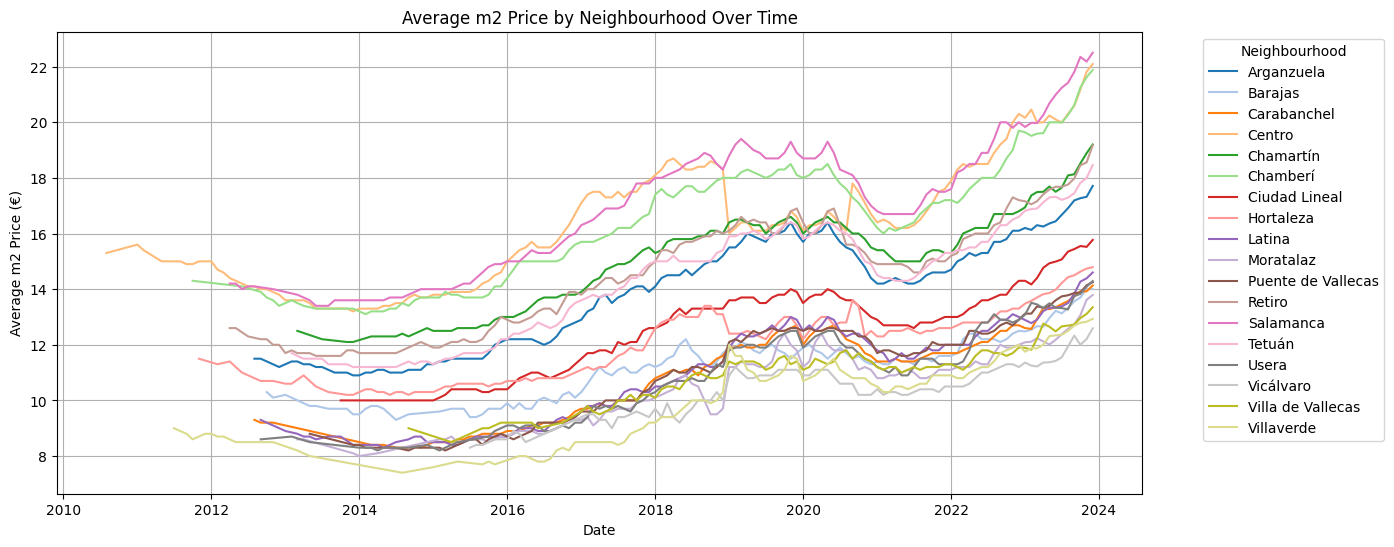

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_df = df.groupby(['neighbourhood_group', 'date'])['m2_price'].mean().reset_index()
neighbourhoods = grouped_df['neighbourhood_group'].unique()

# Color palette for assigning a color to each neighbourhood
palette = sns.color_palette("tab20", len(neighbourhoods))

# Average m2 Price vs Neighborhood
plt.figure(figsize=(14, 6))
for i, neighbourhood in enumerate(neighbourhoods):
    subset = grouped_df[grouped_df['neighbourhood_group'] == neighbourhood]
    plt.plot(subset['date'], subset['m2_price'], label=neighbourhood, color=palette[i])

plt.xlabel('Date')
plt.ylabel('Average m2 Price (€)')
plt.title('Average m2 Price by Neighbourhood Over Time')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Se puede observar una tendencia general ascendente para todos los barrios analizados en lo que se refiere al precio medio por metro cuadrado, lo que concuerda dada la creciente inflación en el periodo analizado. Destaca la bajada en el precio medio durante el año 2020, coincidiendo con el COVID-19. Ello se atribuye a la incertidumbre económica y las restricciones gubernamentales impuestas durante ese periodo. Más tarde, a partir de 2021, se vuelve a observar la tendencia al alza en los precios, impulsada en gran medida por la inflación, reflejando la la recuperación económica.

En cuanto a los barrios, se observa que el barrio de Salamanca es el que mayor precio medio por metro cuadrado tiene, seguido de Chamberí y Centro. Por otro lado, los barrios de Usera y Villaverde son los que tienen un precio medio por metro cuadrado más bajo.  Asimismo, se puede recalcar que la subida de los precios en los barrios más caros ha sido más acentuada que en los barrios más baratos.

- ¿Existe una correlación entre el precio por metro cuadrado (`m2_price`) y la densidad de población (`population_density`)?


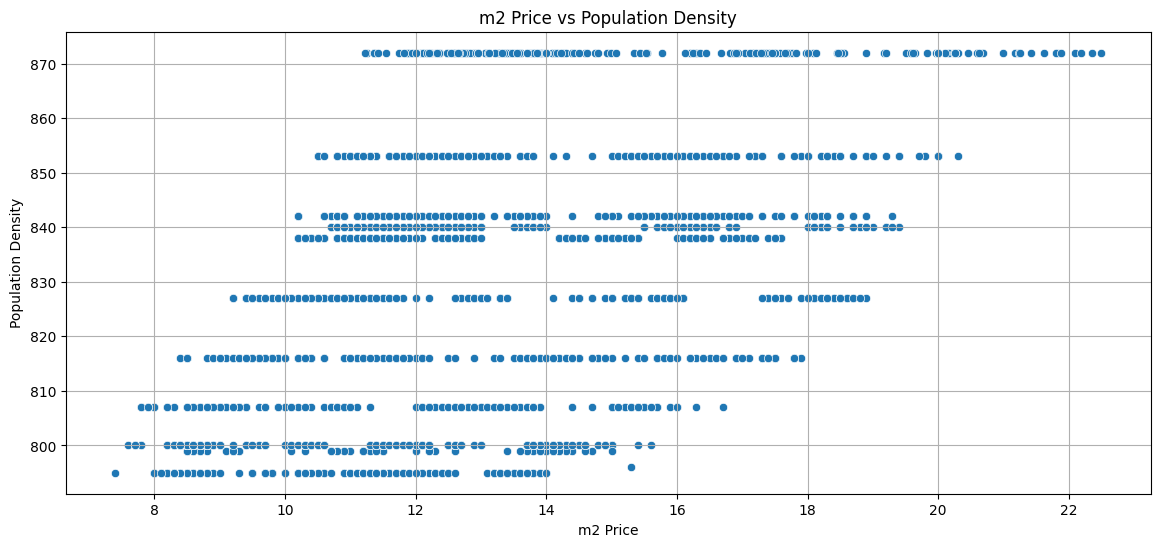

Correlation coefficient between m2_price and population_density: 0.4713674428403693


In [22]:
import seaborn as sns

# Fuel Price vs Weekly Sales
plt.figure(figsize=(14, 6))
sns.scatterplot(x='m2_price', y='population_density', data=df)
plt.title('m2 Price vs Population Density')
plt.xlabel('m2 Price')
plt.ylabel('Population Density')
plt.grid(True)
plt.show()

# Correlation coefficient
correlation = df['m2_price'].corr(df['population_density'])

print(f"Correlation coefficient between m2_price and population_density: {correlation}")

La correlación entre el precio por metro cuadrado (`m2_price`) y la densidad de población (`population_density`) es de aproximadamente 0.471, lo que indica una relación positiva, aunque no muy fuerte, entre estas dos variables. Ello significa que, a medida que la densidad de población aumenta, el precio por metro cuadrado también lo hace, aunque no de manera muy directa o perfecta.

En la gráfica, se puede observar una tendencia ascendente, lo que visualmente confirma la correlación positiva comentada anteriormente. Sin embargo, cabe resaltar la dispersión considerable de los puntos, recalcando el hecho de que otros factores además de la densidad de población también influyen en el precio por metro cuadrado.

- ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (`reviews_per_month`) o en la disponibilidad anual (`availability_365`)?

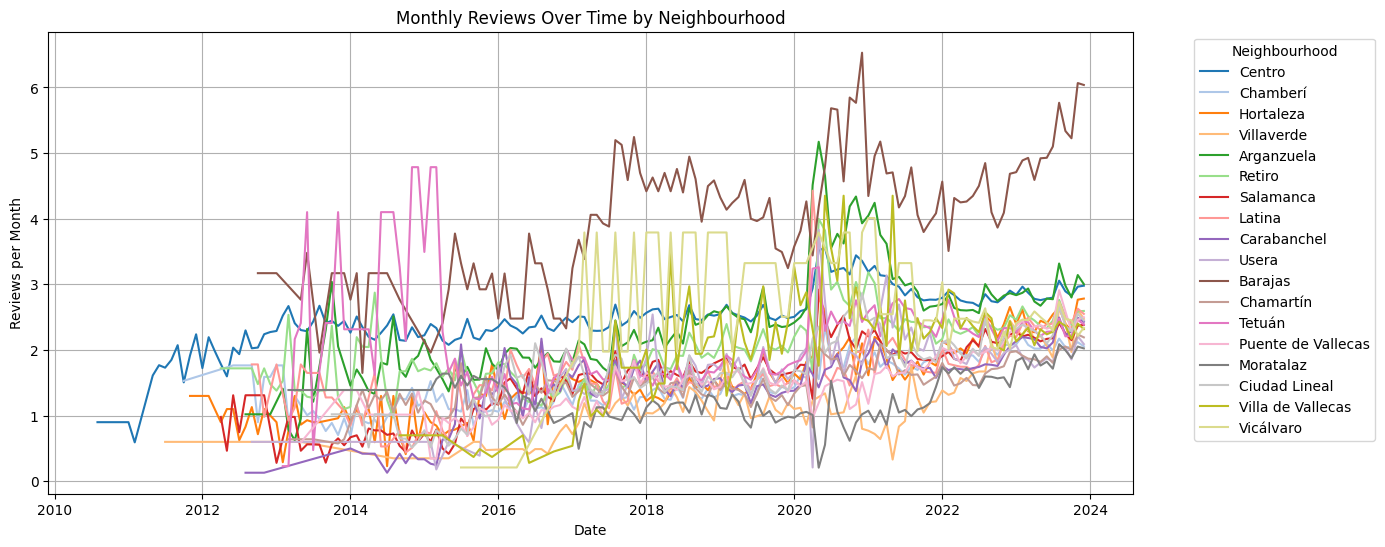

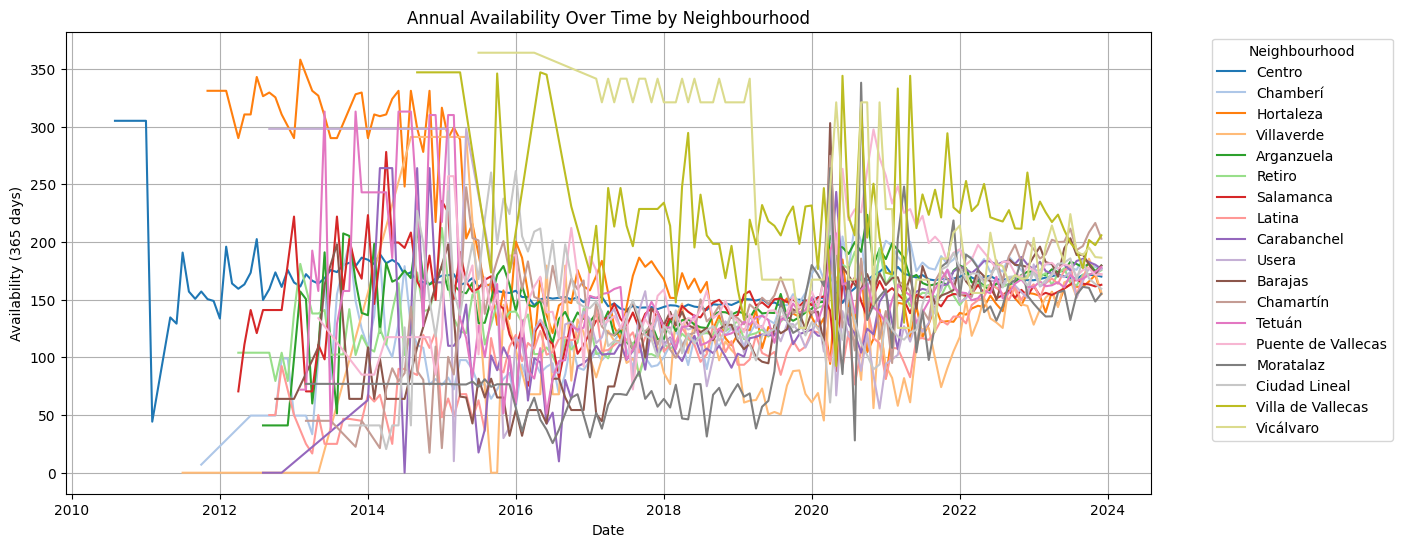

In [23]:
# Reviews_per_month over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='date', y='reviews_per_month', hue='neighbourhood_group', palette=palette)
plt.title('Monthly Reviews Over Time by Neighbourhood')
plt.xlabel('Date')
plt.ylabel('Reviews per Month')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Availability_365 over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='date', y='availability_365', hue='neighbourhood_group', palette=palette)
plt.title('Annual Availability Over Time by Neighbourhood')
plt.xlabel('Date')
plt.ylabel('Availability (365 days)')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Dado que tantos las reseñas como la disponibilidad de las viviendas ubicadas en los distintos barrios es diferente y los gráficos anteriores no muestran un claro patrón de estacionalidad, se busca analizar los barrios más interesantes, que pueden ser aquellos que tienen viviendas más caras frente los barrios con residencias baratas con el objeto de identificar posibles patrones estacionales en estos alquileres.

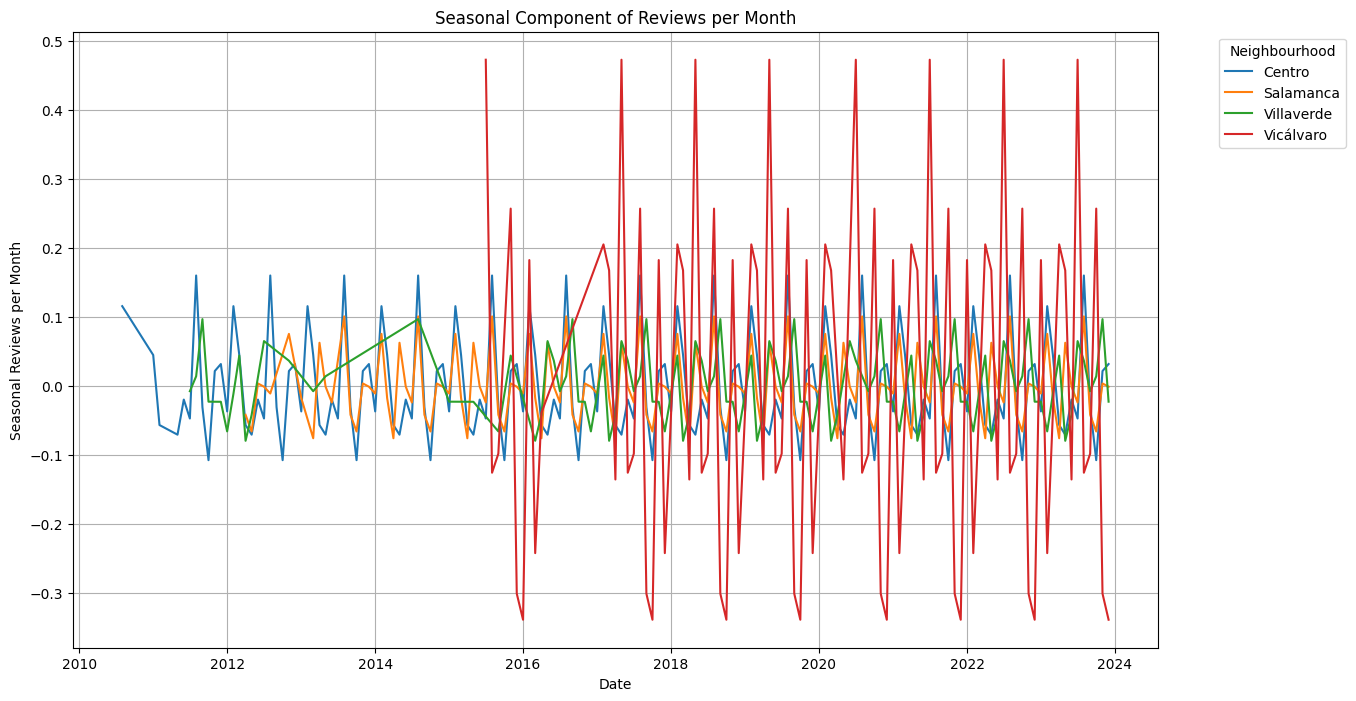

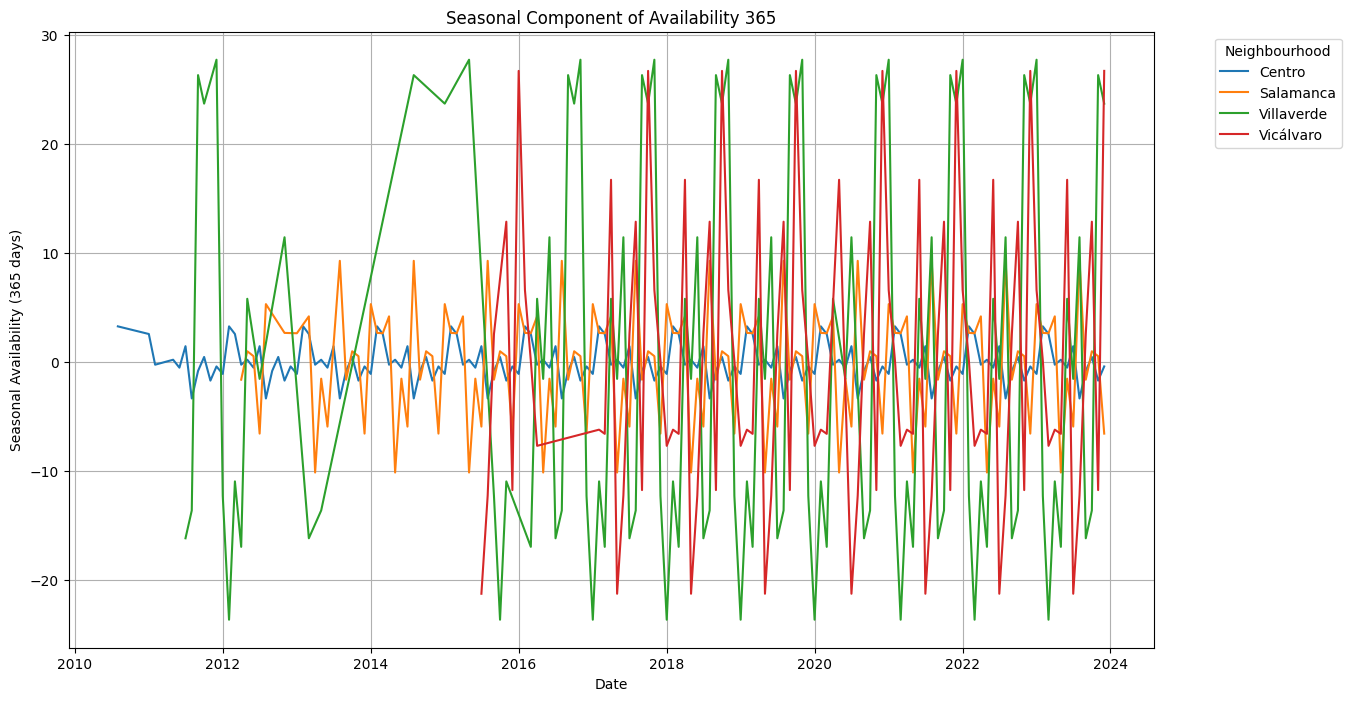

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Selecting the neighbourhoods of interest (cheap and expensive) for seasonal decomposition
selected_neighbourhoods = ['Centro', 'Salamanca', 'Villaverde', 'Vicálvaro']

seasonal_reviews = {}
seasonal_availability = {}

# Seasonal decomposition for the neighborhoods selected
for neighbourhood in selected_neighbourhoods:
    neighbourhood_data = df[df['neighbourhood_group'] == neighbourhood]
    
    decomposition_reviews = seasonal_decompose(neighbourhood_data.set_index('date')['reviews_per_month'], model='additive', period=12)
    seasonal_reviews[neighbourhood] = decomposition_reviews.seasonal
    
    decomposition_availability = seasonal_decompose(neighbourhood_data.set_index('date')['availability_365'], model='additive', period=12)
    seasonal_availability[neighbourhood] = decomposition_availability.seasonal

# Seasonal component for Reviews_per_month
plt.figure(figsize=(14, 8))
for neighbourhood in selected_neighbourhoods:
    plt.plot(seasonal_reviews[neighbourhood], label=neighbourhood)
plt.title('Seasonal Component of Reviews per Month')
plt.xlabel('Date')
plt.ylabel('Seasonal Reviews per Month')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Seasonal component for Availability_365
plt.figure(figsize=(14, 8))
for neighbourhood in selected_neighbourhoods:
    plt.plot(seasonal_availability[neighbourhood], label=neighbourhood)
plt.title('Seasonal Component of Availability 365')
plt.xlabel('Date')
plt.ylabel('Seasonal Availability (365 days)')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Los barrios con alquileres más caros presentan un claro patrón de estacionalidad desde el 2012, mientras que en los baratos (especialmente Villaverde) no se evidencia un patrón hasta más adelante en 2016. Asimismo, en los barrios más caros (Centro y Salamanca), tanto la componente estacional en las reseñas mensuales como la disponibilidad anual es más suave y muestra una variabilidad reducida con respecto a los barrios con alquileres más baratos (Villaverde y Vicálvaro). Ello puede deberse a la demanda más constante a lo largo del año y, sobre todo, al alto poder adquisitivo de los residentes en estas zonas y al mercado inmobiliario mucho más caro que es menos sensible a las fluctuaciones estacionales. La disponibilidad anual también muestra una variabilidad reducida, lo que sugiere una ocupación más constante, con menos propiedades entrando y saliendo del mercado.

Este análisis tiene sentido dado que en barrios como Salamanca o Centro, la mayoría de las propiedades están ocupadas por residentes permanentes con un alto poder  adquisitivo. El alto coste de la zona hace que estos barrios no dependan en absoluto de alquileres temporales o turísticos reduciendo, por tanto, la variabilidad estacional. La disponibilidad también es más estable, ya que las propiedades suelen estar ocupadas todo el año.

Por el contrario, en los barrios baratos como Villaverde y Vicálvaro, la estacionalidad en las reseñas mensuales es mucho más pronunciada, indicando una demanda más fluctuante. Esto puede deberse a factores como los periodos vacacionales (verano), temporadas turísticas o alquileres de duración más corta. La disponibilidad anual también presenta una mayor variabilidad, mostrando una ocupación menos estable debido a una mayor oferta de propiedades y menor demanda. Ello evidencia que estos barrios dependen más de alquileres temporales con inquilinos que cambian más frecuentemente. 

Estas zonas barriales pueden atraer a inquilinos con necesidades más temporales (estudiantes, trabajadores temporales), lo que genera más cambios en ocupación y disponibilidad. También pueden ser objeto de aquellos turistas que buscan opciones más económicas, generando los picos en variables como reseñas y ocupación durante temporadas altas.

- ¿Qué vecindarios tienen el mayor número de anfitriones (`hosts_count`) y cómo se relaciona con el precio de la vivienda?

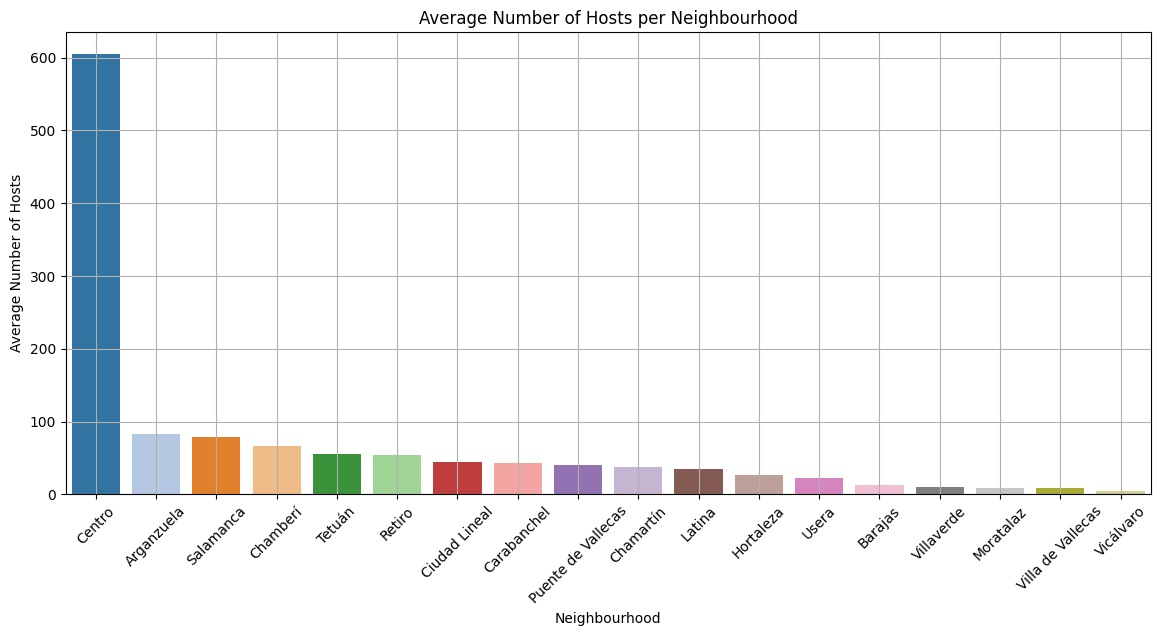

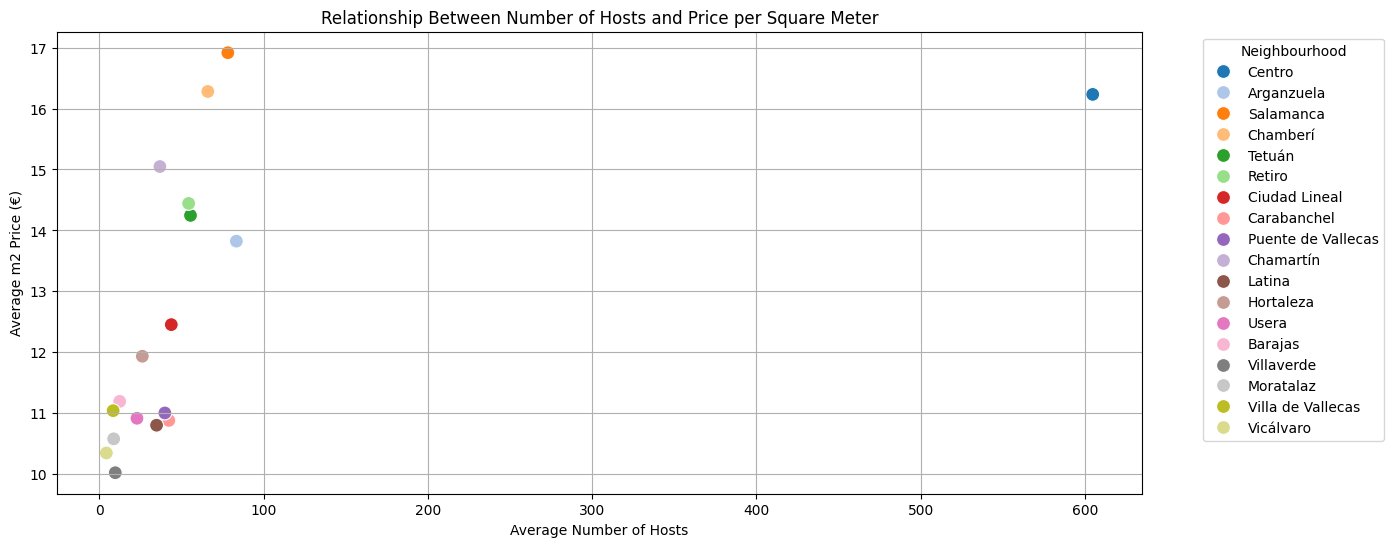

In [25]:
hosts_price_df = df.groupby('neighbourhood_group').agg({'hosts_count': 'mean', 'm2_price': 'mean'}).reset_index()
hosts_price_df = hosts_price_df.sort_values(by='hosts_count', ascending=False)

# Number of hosts vs Neighbourhood
plt.figure(figsize=(14, 6))
sns.barplot(x='neighbourhood_group', y='hosts_count', data=hosts_price_df, hue='neighbourhood_group', palette='tab20', legend=False)
plt.title('Average Number of Hosts per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Number of Hosts')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Relationship between the Number of hosts and the Price per m2
plt.figure(figsize=(14, 6))
sns.scatterplot(x='hosts_count', y='m2_price', data=hosts_price_df, hue='neighbourhood_group', palette='tab20', s=100)
plt.title('Relationship Between Number of Hosts and Price per Square Meter')
plt.xlabel('Average Number of Hosts')
plt.ylabel('Average m2 Price (€)')
plt.legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Se puede corroborar como el barrio del centro tiene el mayor número de hosts con diferencia. Otros como Arganzuela, Salamanca y Chamberí también tienen un número considerable, pero significativamente menor. Además, se muestra una relación positiva entre el número de hosts y el precio por metro cuadrado, es decir, los barrios con más anfitriones tienden a tener precios más altos por metro cuadrado. Esto concuerda con análisis anteriores dado que el centro es un área muy atractiva para turistas y residentes debido a su ubicación, cercanía a actividades turísticas y culturales, restaurantes y servicios. Todo ello hace que los anfitriones puedan subir el precio de las propiedades que alquilan en esta zona, lo que se refleja en el precio por metro cuadrado más alto, ya que la demanda es alta y puede soportarlo.

El Centro se ha convertido en un lugar popular para alquileres a corto plazo. Esta alta demanda cortoplacista, junto a los otros factores mencionados, ha significado un aumento en los precios de los alquileres. Los propietarios pueden preferir alquilar sus propiedades a turistas a precios más altos en lugar de a residentes a largo plazo, lo que reduce la oferta de viviendas disponibles para residentes permanentes o residentes españoles y, aumentando los precios. La gráfica de dispersión confirma esto, mostrando que Centro, con su alto número de anfitriones, también tiene uno de los precios por metro cuadrado más altos.

- ¿Qué vecindarios muestran el mayor crecimiento en precios (`m2_price` o `night_price`) entre años (`year`)?

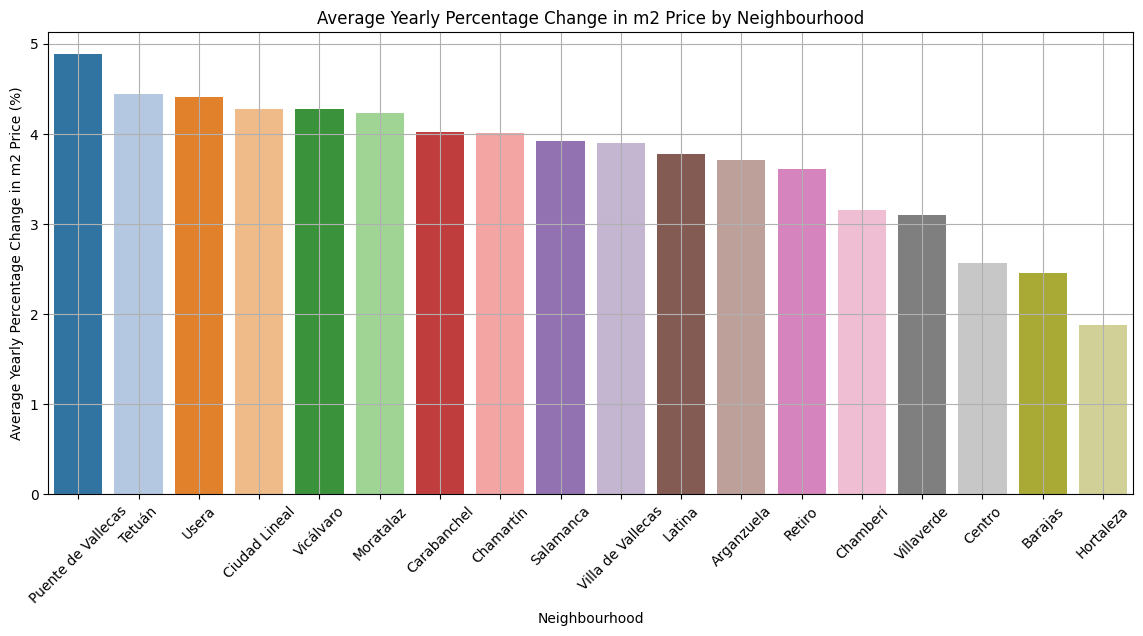

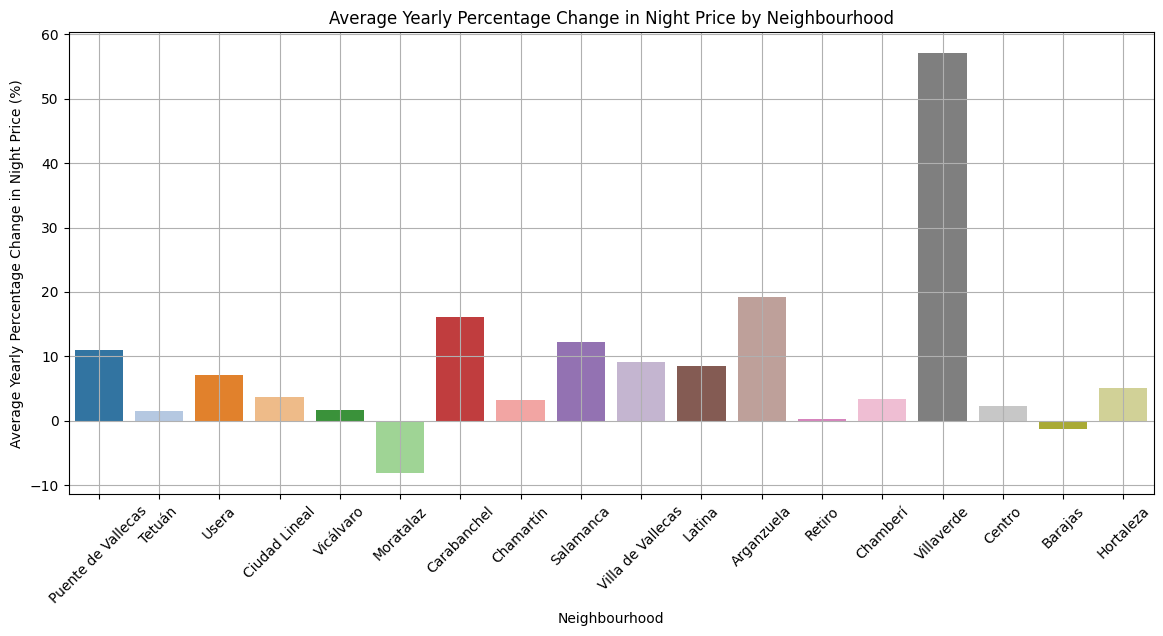

In [26]:
df['year'] = df['date'].dt.year

yearly_prices = df.groupby(['neighbourhood_group', 'year']).agg({'m2_price': 'mean', 'nigth_price': 'mean'}).reset_index()
yearly_prices['m2_price_pct_change'] = yearly_prices.groupby('neighbourhood_group')['m2_price'].pct_change() * 100
yearly_prices['nigth_price_pct_change'] = yearly_prices.groupby('neighbourhood_group')['nigth_price'].pct_change() * 100

avg_growth = yearly_prices.groupby('neighbourhood_group').agg({'m2_price_pct_change': 'mean', 'nigth_price_pct_change': 'mean'}).reset_index()
avg_growth = avg_growth.sort_values(by=['m2_price_pct_change', 'nigth_price_pct_change'], ascending=False)

# Average yearly percentage change in m2_price
plt.figure(figsize=(14, 6))
sns.barplot(x='neighbourhood_group', y='m2_price_pct_change', data=avg_growth, hue='neighbourhood_group', palette='tab20')
plt.title('Average Yearly Percentage Change in m2 Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Yearly Percentage Change in m2 Price (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Average yearly percentage change in night_price
plt.figure(figsize=(14, 6))
sns.barplot(x='neighbourhood_group', y='nigth_price_pct_change', data=avg_growth, hue='neighbourhood_group', palette='tab20')
plt.title('Average Yearly Percentage Change in Night Price by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Yearly Percentage Change in Night Price (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Los barrios con mayor promedio de cambio porcentual anual en lo que se refiere a precios por metro cuadrado en los años analizados (2012-2024) son el Puente de Vallecas, Tetuán y Usera, alcanzando valores en torno al 4.5%. Esto puede deberse a una posible revalorización de zonas más asequibles, ya sea por una mejora en las infraestructuras o un crecimiento de la demanda. Estos barrios también muestran un crecimiento destacado en los precios nocturnos, con el Puente de Vallecas siendo el más alto (10%).

Por otro lado, en cuanto al precio nocturno los barrios como Centro y Moratalaz presentan comportamientos más diferentes. A pesar de ser una zona atractiva, el centro muestra un crecimiento mucho más moderado en lo que a precio medio por m2 se refiere y una variación muy pequeña en los precios nocturnos. Como se ha mencionado anteriormente, esto podría reflejar una sobredemanda y una saturación en el mercado inmobiliario. Por su parte, Moratalaz destaca por el descenso en los precios nocturnos, lo que significaría una menor demanda de alquileres temporales y a un enfoque más residencial. Destaca Villaverde, que aunque tiene un crecimiento moderado de precio por m2, muestra un gran aumento en el precio por noche, incitando un posible interés en esta zona más barata.

- ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (`m2_price`) o el precio por noche (`night_price`)?

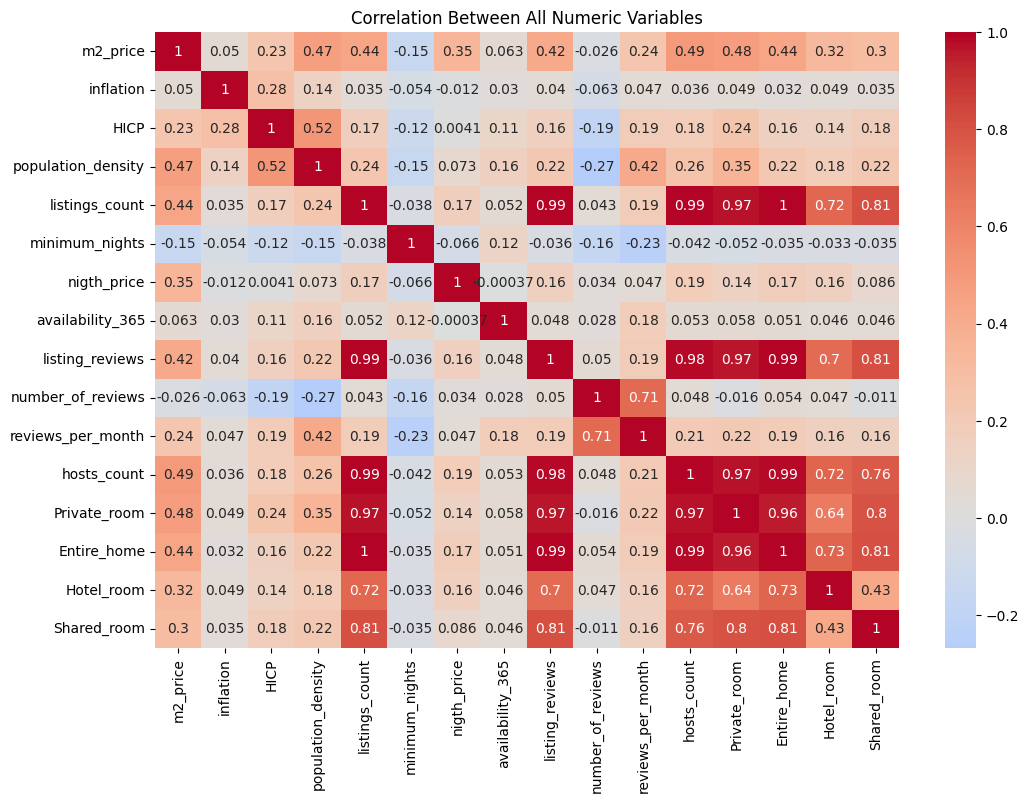

Coefficients for m2_price:
{'inflation': 0.02848325752634197, 'HICP': -0.027649547427239296, 'population_density': 0.06458655317332256, 'listings_count': 0.0010630021266662389, 'minimum_nights': -0.012209969497315008, 'availability_365': 0.0006395973300170952, 'listing_reviews': -0.0019428578334188071, 'number_of_reviews': 0.00905747205061896, 'reviews_per_month': -0.9557484005823765, 'hosts_count': 0.04348175567016626, 'Private_room': -0.030244471232768827, 'Entire_home': -0.012106651692306337, 'Hotel_room': -0.11270221837613625, 'Shared_room': 0.15611634342787573}

Coefficients for nigth_price:
{'inflation': -0.9868769975019913, 'HICP': -0.6243713885657391, 'population_density': 0.6091557041018268, 'listings_count': -0.35745099095483823, 'minimum_nights': -0.17320002253866337, 'availability_365': 0.0015174494716773458, 'listing_reviews': -0.006368891951900757, 'number_of_reviews': 0.11941196268478613, 'reviews_per_month': -14.069038705464585, 'hosts_count': 0.4230667023488244, 'Priva

In [27]:
from sklearn.linear_model import LinearRegression

numeric_data = df.select_dtypes(include=['float64', 'int64']).dropna()
correlation_matrix = numeric_data.corr()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between All Numeric Variables')
plt.show()

# Linear Regression to explain m2_price and nigth_price
X = numeric_data.drop(columns=['m2_price', 'nigth_price'], errors='ignore')
y_m2 = numeric_data['m2_price']
y_night = numeric_data['nigth_price']

# M2_price
model_m2 = LinearRegression()
model_m2.fit(X, y_m2)
coef_m2 = dict(zip(X.columns, model_m2.coef_))

# Nigth_price
model_night = LinearRegression()
model_night.fit(X, y_night)
coef_night = dict(zip(X.columns, model_night.coef_))

# Coefficients
print("Coefficients for m2_price:")
print(coef_m2)

print("\nCoefficients for nigth_price:")
print(coef_night)

Precio por metro cuadrado (`m2_price`):
- La variable con mayor influencia es `reviews_per_month` (-0.95), lo que indica que un aumento en las reseñas mensuales se correlaciona negativamente con una pequeña caída en el precio por metro cuadrado.
- Algunos factores positivos podrían ser `population_density` (0.06) y `inflation` (0.03), aunque tienen un efecto no muy considerable.

Precio por noche (`nigth_price`):
- Nuevamente, el factor más relevante es `reviews_per_month` (-14.07), lo que significa que cuando aumenta el número de reseñas, el precio por noche decrece.
- Variables como `inflation` (-0.98) y `HICP` (-0.62) muestran una correlación negativa importante con esta variable.
- Por otro lado, `population_density` (0.60) y `Shared_room` (1.09) tienen efectos positivos considerables, indicando que áreas más densas o con habitaciones compartidas tienden a ver aumentos en el precio por noche.


2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

aggregated_data = df.drop(columns=['neighbourhood_group', 'date'], errors='ignore').dropna()
X = aggregated_data.drop(columns=['m2_price'], errors='ignore')
y = aggregated_data['m2_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

# Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse_m2 = mean_squared_error(y_test, rf_y_pred)
rf_r2_m2 = r2_score(y_test, rf_y_pred)
rf_importances_m2 = dict(zip(X.columns, rf_model.feature_importances_))

# Results
print("Linear Regression Results for m2_price:")
print(f"MSE: {linear_mse:.2f}, R2: {linear_r2:.2f}")
print("Coefficients:")
print(dict(zip(X.columns, linear_model.coef_)))

print("\nRandom Forest Results for m2_price:")
print(f"MSE: {rf_mse_m2:.2f}, R2: {rf_r2_m2:.2f}")
print("Feature Importances:")
print(rf_importances_m2)

Linear Regression Results for m2_price:
MSE: 3.74, R2: 0.56
Coefficients:
{'inflation': 0.08868956519732847, 'HICP': -0.017562470405170272, 'population_density': 0.08734975543611768, 'listings_count': 0.008993991633081608, 'minimum_nights': -0.011174920496062512, 'nigth_price': 0.008286556717343421, 'availability_365': 0.001298588235909581, 'listing_reviews': -0.0024253363172520746, 'number_of_reviews': 0.006278420260830859, 'reviews_per_month': -0.6409749910659539, 'hosts_count': 0.03922334814155816, 'Private_room': -0.028962598668776863, 'Entire_home': -0.01707612333351713, 'Hotel_room': -0.09091109742640699, 'Shared_room': 0.14594381106178195, 'year': -0.2646692387035883}

Random Forest Results for m2_price:
MSE: 0.51, R2: 0.94
Feature Importances:
{'inflation': 0.003351333955025201, 'HICP': 0.013701959508239075, 'population_density': 0.029585987164825394, 'listings_count': 0.009115482343119877, 'minimum_nights': 0.022439917209617157, 'nigth_price': 0.1755714488096036, 'availability

El modelo de Random Forest se ajusta mucho mejor que el modelo lineal, lo que se comprueba rapidamente con su mayor R2 y menos MSE. Seguramente la simplicidad de este último no sea suficiente para explicar el precio por m2.

- `Entire_home`: Es la variable más importante (59%), lo que indica que la proporción de propiedad que ofrecen viviendas completas para el alquiler turístico explica con gran relevancia la variación del precio por m2.
- `Night_price`: Tiene una importancia del 17.6%, lo que sugiere que el precio por noche determina en determinada medida el precio por m2, lo que tiene sentido dado que ambos precios están relacionados.
- `Year`: Aunque tiene un 4.3% de relevancia, es interesante notar que el año también influye, es decir, el precio por m2 ha ido variando a lo largo de los años.
- Otras variables como `Private_room` y `population_density` también aportan algo de información relevante, pero en mucha menor relevancia.
- Por último, cabe destacar que tanto la inflación como el HICP no tienen un impacto significativo, lo que sugiere que otros factores como la oferta y la demanda son más importantes en la determinación de los precios de los alquileres, lo que tiene sentido dado que los propietarios se guían más por la demanda y la competencia en el mercado que por la inflación.

3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)

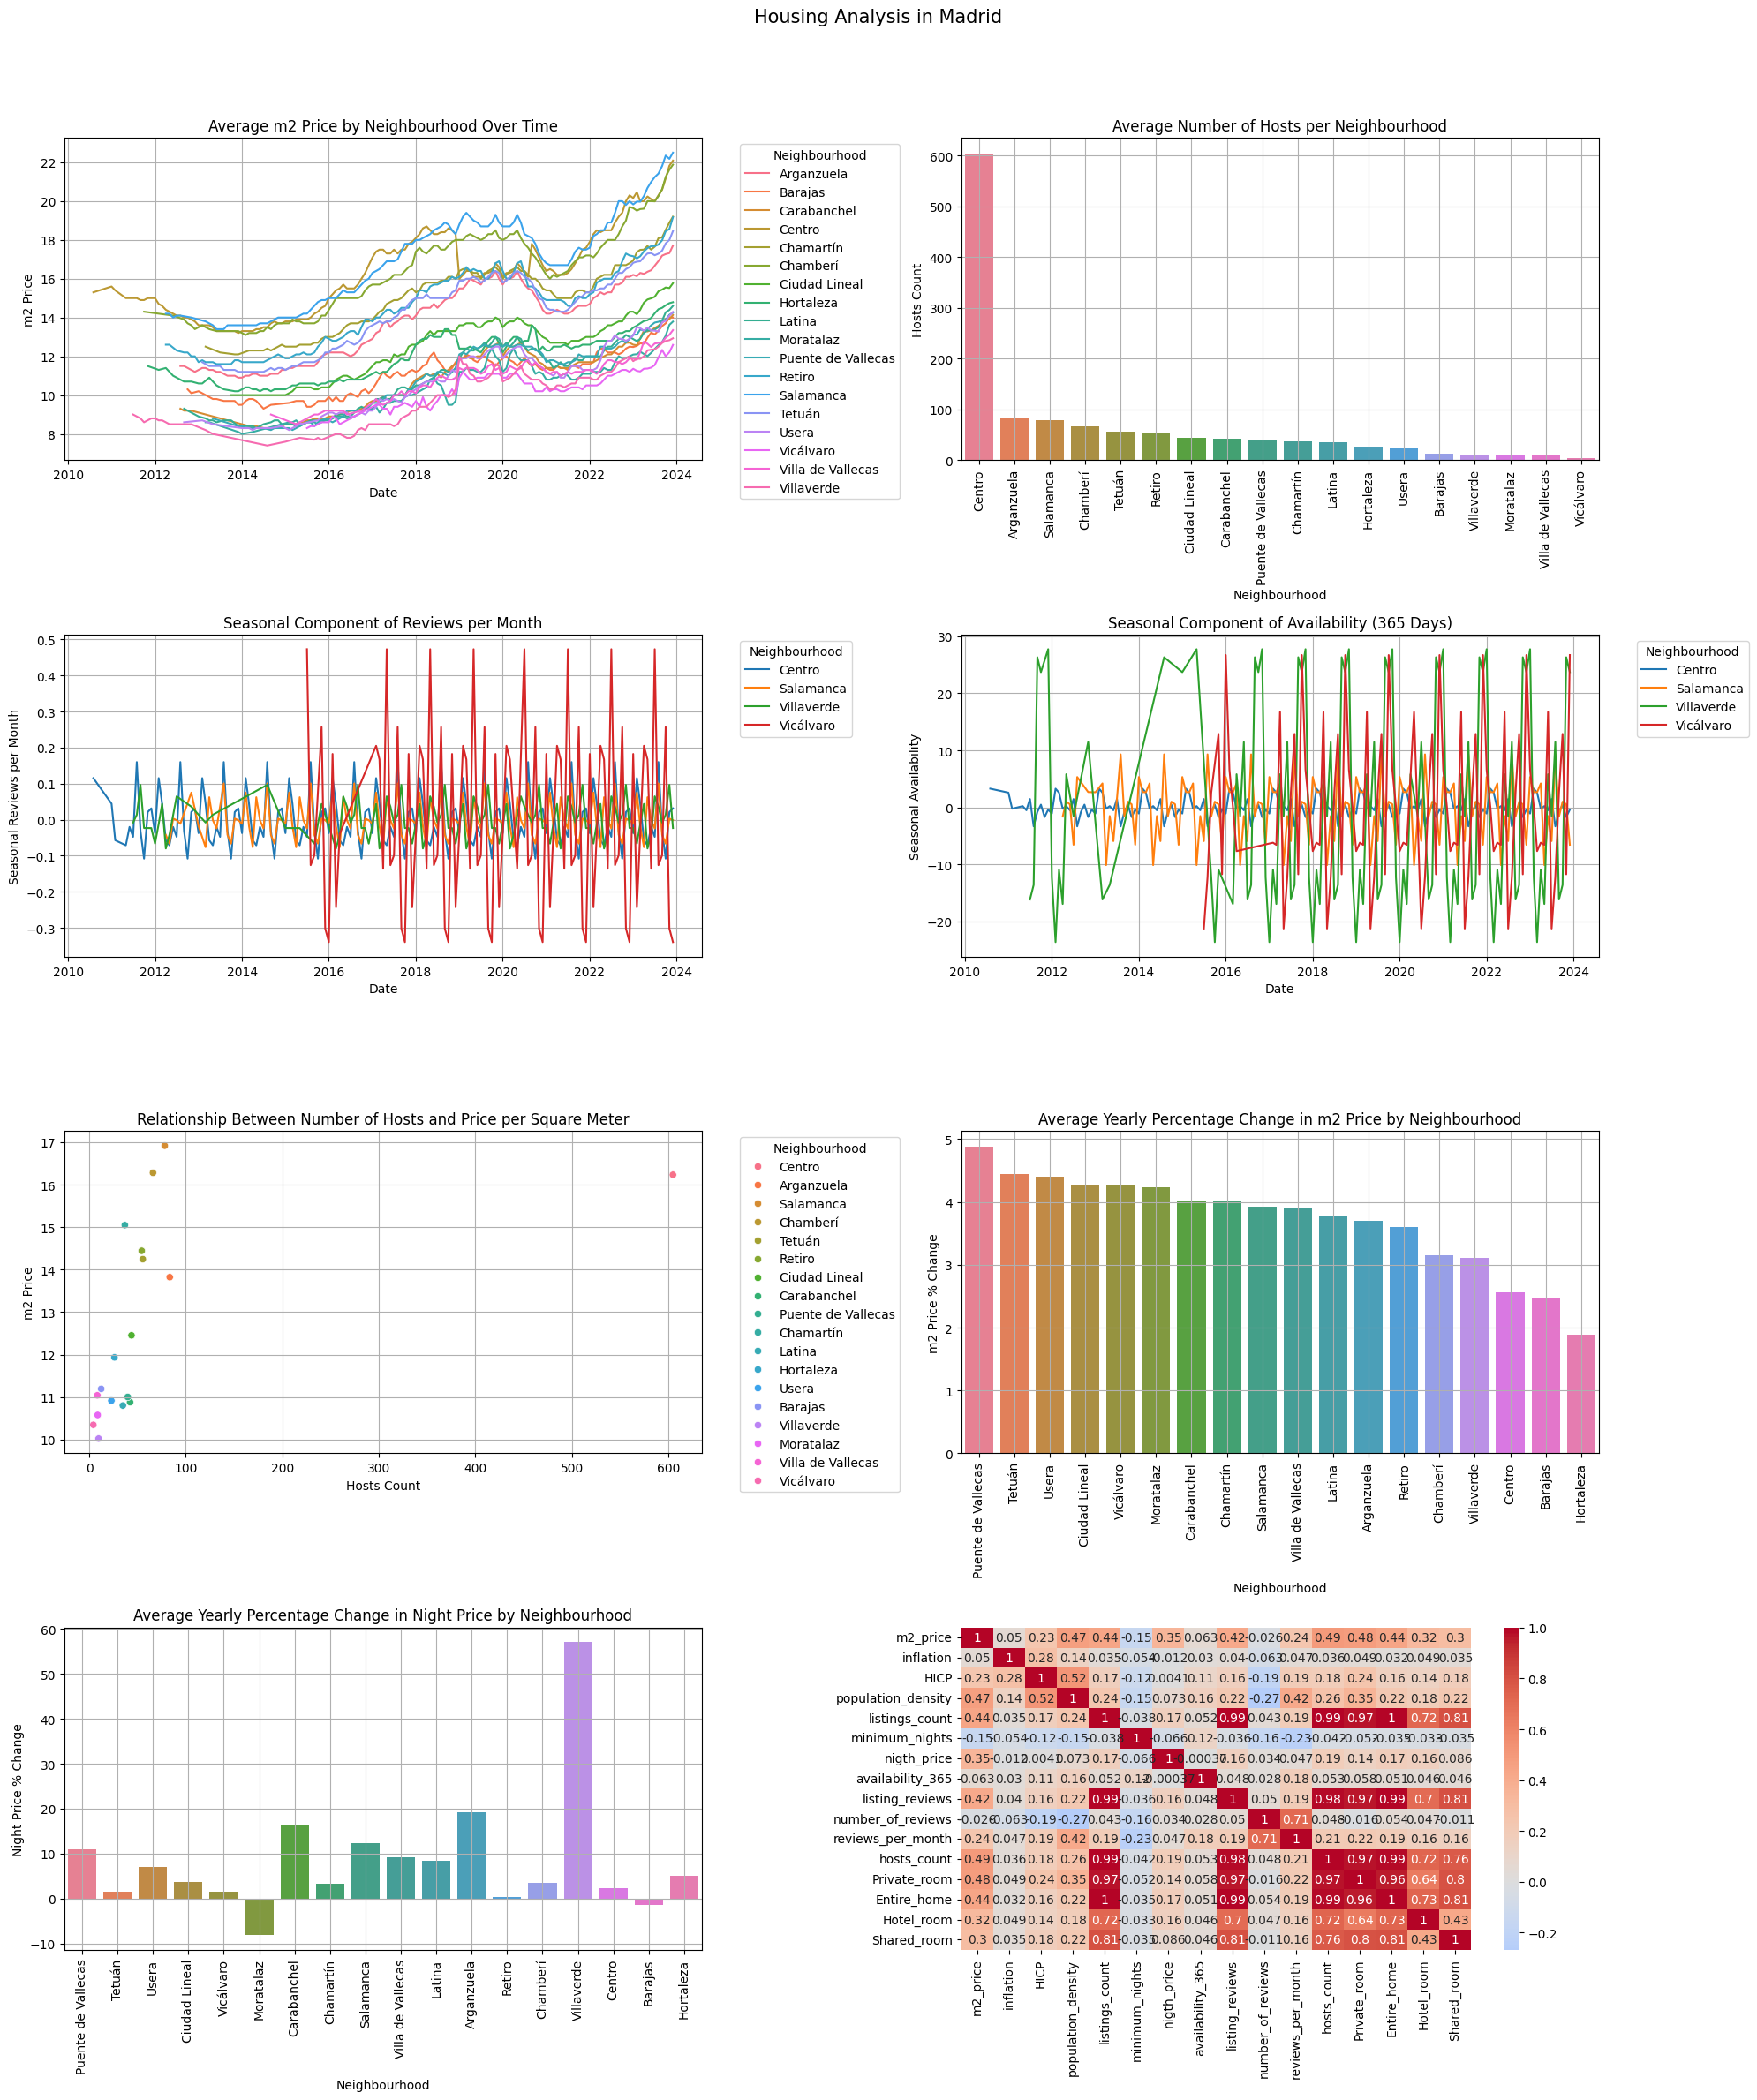

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axes = plt.subplots(4, 2, figsize=(20, 25))
fig.suptitle('Housing Analysis in Madrid', fontsize=15)

# Average m2 Price by Neighbourhood Group Over Time
sns.lineplot(data=grouped_df, x='date', y='m2_price', hue='neighbourhood_group', ax=axes[0, 0])
axes[0, 0].set_title('Average m2 Price by Neighbourhood Over Time', fontsize=12)
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('m2 Price')
axes[0, 0].legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].grid(True)

# Average Number of Hosts per Neighbourhood
sns.barplot(data=hosts_price_df, x='neighbourhood_group', y='hosts_count', hue='neighbourhood_group', ax=axes[0, 1])
axes[0, 1].set_title('Average Number of Hosts per Neighbourhood', fontsize=12)
axes[0, 1].set_xlabel('Neighbourhood')
axes[0, 1].set_ylabel('Hosts Count')
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].grid(True)

# Seasonal Component Reviews per Month
for neighbourhood, seasonal_data in seasonal_reviews.items():
    axes[1, 0].plot(seasonal_data.index, seasonal_data.values, label=neighbourhood)
axes[1, 0].set_title('Seasonal Component of Reviews per Month', fontsize=12)
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Seasonal Reviews per Month')
axes[1, 0].legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 0].grid(True)

# Seasonal Component Availability 365
for neighbourhood, seasonal_data in seasonal_availability.items():
    axes[1, 1].plot(seasonal_data.index, seasonal_data.values, label=neighbourhood)
axes[1, 1].set_title('Seasonal Component of Availability (365 Days)', fontsize=12)
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Seasonal Availability')
axes[1, 1].legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(True)

# Relationship Hosts Count vs m2 Price
sns.scatterplot(data=hosts_price_df, x='hosts_count', y='m2_price', hue='neighbourhood_group', ax=axes[2, 0])
axes[2, 0].set_title('Relationship Between Number of Hosts and Price per Square Meter', fontsize=12)
axes[2, 0].set_xlabel('Hosts Count')
axes[2, 0].set_ylabel('m2 Price')
axes[2, 0].legend(title='Neighbourhood', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2, 0].grid(True)

# Average Yearly Percentage Change in m2 Price by Neighbourhood
sns.barplot(data=avg_growth, x='neighbourhood_group', y='m2_price_pct_change', hue='neighbourhood_group', ax=axes[2, 1])
axes[2, 1].set_title('Average Yearly Percentage Change in m2 Price by Neighbourhood', fontsize=12)
axes[2, 1].set_xlabel('Neighbourhood')
axes[2, 1].set_ylabel('m2 Price % Change')
axes[2, 1].tick_params(axis='x', rotation=90)
axes[2, 1].grid(True)

# Average Yearly Percentage Change in m2 Price by Neighbourhood
sns.barplot(data=avg_growth, x='neighbourhood_group', y='m2_price_pct_change', hue='neighbourhood_group', ax=axes[2, 1])
axes[2, 1].set_title('Average Yearly Percentage Change in m2 Price by Neighbourhood', fontsize=12)
axes[2, 1].set_xlabel('Neighbourhood')
axes[2, 1].set_ylabel('m2 Price % Change')
axes[2, 1].tick_params(axis='x', rotation=90)
axes[2, 1].grid(True)

# Average Yearly Percentage Change in Night Price by Neighbourhood
sns.barplot(data=avg_growth, x='neighbourhood_group', y='nigth_price_pct_change', hue='neighbourhood_group', ax=axes[3, 0])
axes[3, 0].set_title('Average Yearly Percentage Change in Night Price by Neighbourhood', fontsize=12)
axes[3, 0].set_xlabel('Neighbourhood')
axes[3, 0].set_ylabel('Night Price % Change')
axes[3, 0].tick_params(axis='x', rotation=90)
axes[3, 0].grid(True)

# Correlation Between All Numeric Variables
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[3, 1])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()